In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

### Load data

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data()

In [3]:
train = pd.DataFrame({'crim':x_train[:,0],'zn':x_train[:,1],'indus':x_train[:,2],'chas':x_train[:,3],'nox':x_train[:,4]\
                     ,'rm':x_train[:,5],'age':x_train[:,6],'dis':x_train[:,7],'rad':x_train[:,8],'tax':x_train[:,9]\
                     ,'ptratio':x_train[:,10],'b':x_train[:,11],'lstat':x_train[:,12], 'label':y_train})
test = pd.DataFrame({'crim':x_test[:,0],'zn':x_test[:,1],'indus':x_test[:,2],'chas':x_test[:,3],'nox':x_test[:,4]\
                     ,'rm':x_test[:,5],'age':x_test[:,6],'dis':x_test[:,7],'rad':x_test[:,8],'tax':x_test[:,9]\
                     ,'ptratio':x_test[:,10],'b':x_test[:,11],'lstat':x_test[:,12], 'label':y_test})
data = pd.concat([train, test], ignore_index=True)

In [4]:
data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,label
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72,15.2
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11,42.3
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01,21.1
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,3.47428,0.0,18.10,1.0,0.718,8.780,82.9,1.9047,24.0,666.0,20.2,354.55,5.29,21.9
502,0.07896,0.0,12.83,0.0,0.437,6.273,6.0,4.2515,5.0,398.0,18.7,394.92,6.78,24.1
503,1.83377,0.0,19.58,1.0,0.605,7.802,98.2,2.0407,5.0,403.0,14.7,389.61,1.92,50.0
504,0.35809,0.0,6.20,1.0,0.507,6.951,88.5,2.8617,8.0,307.0,17.4,391.70,9.71,26.7


In [5]:
data.label.value_counts()

50.0    16
25.0     8
22.0     7
21.7     7
23.1     7
        ..
32.2     1
48.8     1
14.8     1
30.5     1
26.7     1
Name: label, Length: 229, dtype: int64

In [6]:
data[data['label']==50.0]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,label
2,4.89822,0.0,18.10,0.0,0.6310,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0
16,6.53876,0.0,18.10,1.0,0.6310,7.016,97.5,1.2024,24.0,666.0,20.2,392.05,2.96,50.0
91,0.02009,95.0,2.68,0.0,0.4161,8.034,31.9,5.1180,4.0,224.0,14.7,390.55,2.88,50.0
111,2.01019,0.0,19.58,0.0,0.6050,7.929,96.2,2.0459,5.0,403.0,14.7,369.30,3.70,50.0
137,0.61154,20.0,3.97,0.0,0.6470,8.704,86.9,1.8010,5.0,264.0,13.0,389.70,5.12,50.0
290,9.23230,0.0,18.10,0.0,0.6310,6.216,100.0,1.1691,24.0,666.0,20.2,366.15,9.53,50.0
317,0.52693,0.0,6.20,0.0,0.5040,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.63,50.0
318,0.01381,80.0,0.46,0.0,0.4220,7.875,32.0,5.6484,4.0,255.0,14.4,394.23,2.97,50.0
321,8.26725,0.0,18.10,1.0,0.6680,5.875,89.6,1.1296,24.0,666.0,20.2,347.88,8.88,50.0
344,1.51902,0.0,19.58,1.0,0.6050,8.375,93.9,2.1620,5.0,403.0,14.7,388.45,3.32,50.0


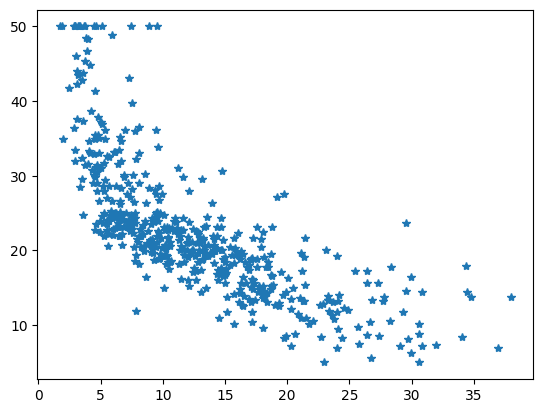

In [7]:
plt.plot(data.lstat, data.label, '*')

### Normalize dataset

<AxesSubplot: >

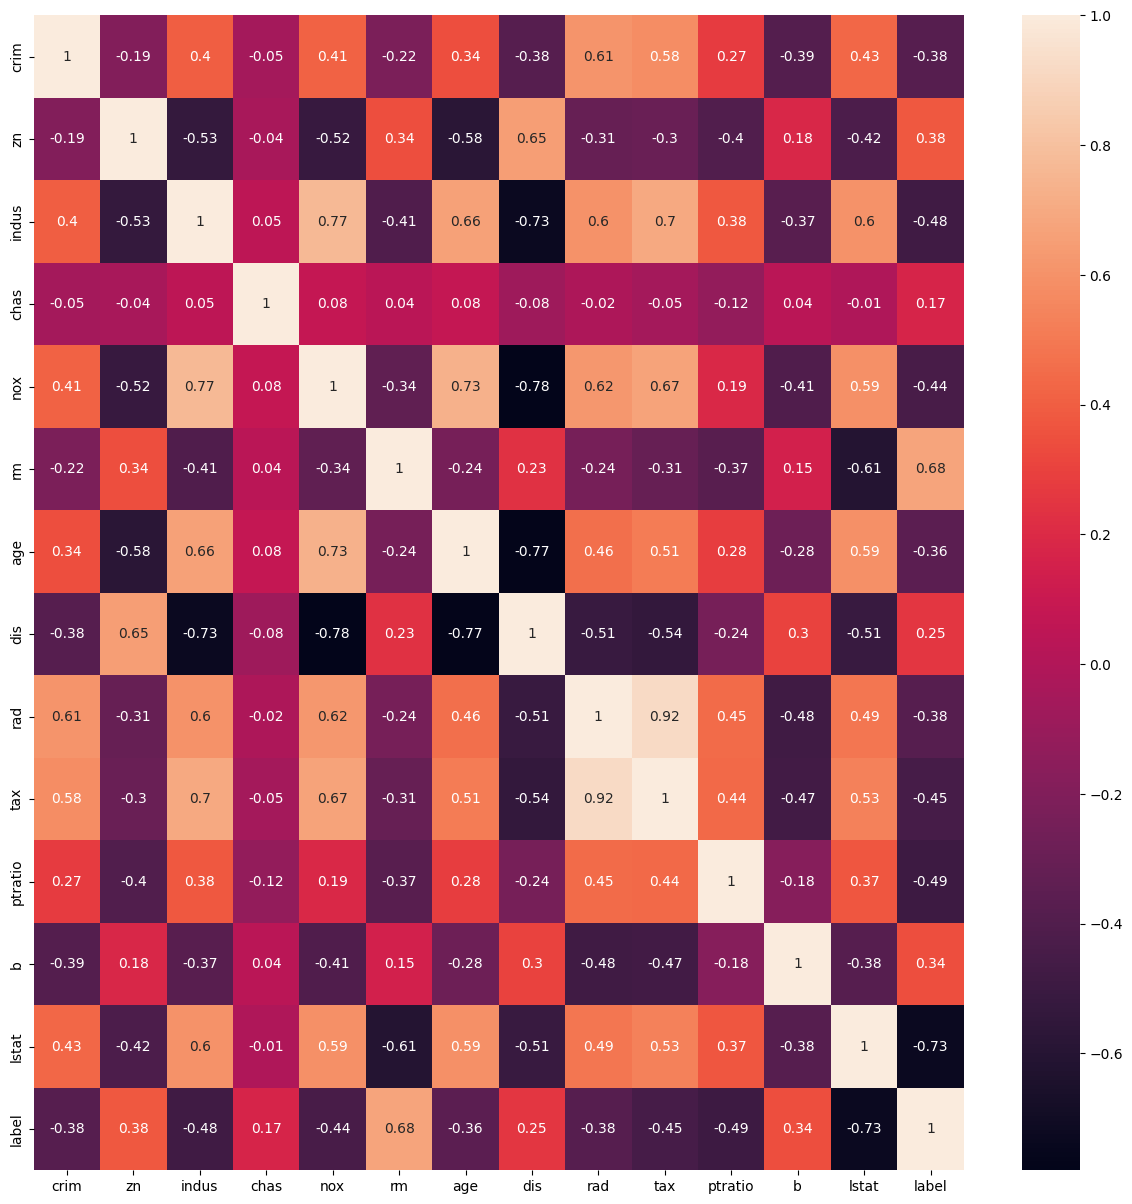

In [8]:
plt.figure(figsize=(15,15))
correlation_matrix = train.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [9]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,label
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


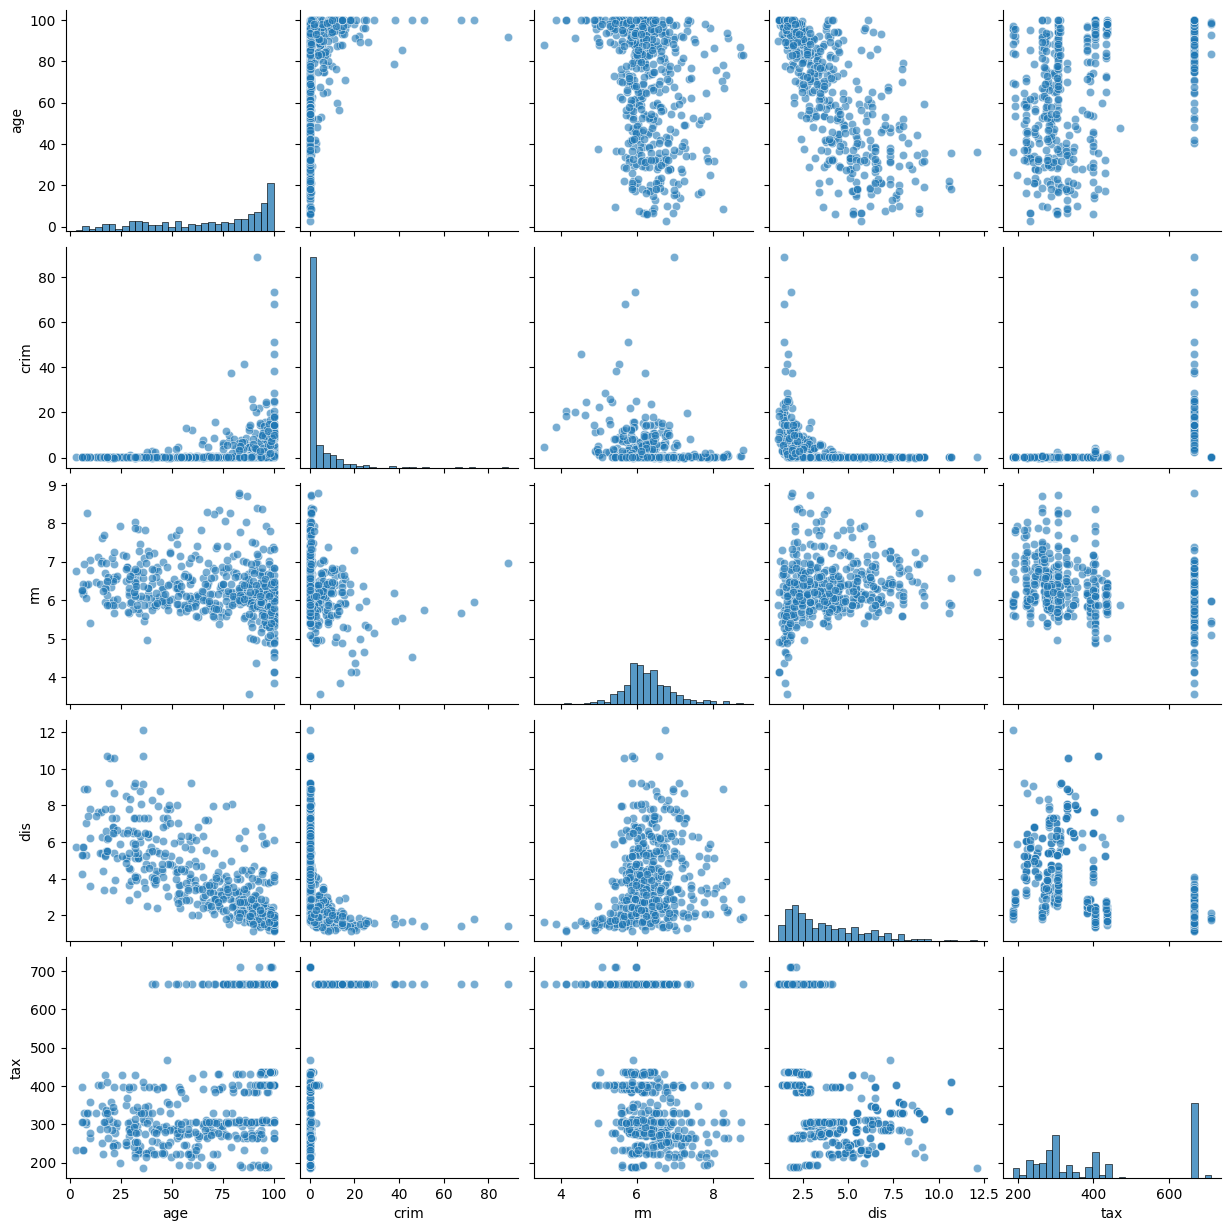

In [10]:
sns.pairplot(data[['age','crim','rm','dis','tax']], 
             plot_kws={'alpha': 0.6},
             diag_kws={'bins': 30})

In [11]:
data['age'] /= 100
data['tax'] /= 1000
data['rad'] /= 100
data['b'] /= 1000
data['lstat'] /= 100

In [12]:
data

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,label
0,1.23247,0.0,8.14,0.0,0.538,6.142,0.917,3.9769,0.04,0.307,21.0,0.39690,0.1872,15.2
1,0.02177,82.5,2.03,0.0,0.415,7.610,0.157,6.2700,0.02,0.348,14.7,0.39538,0.0311,42.3
2,4.89822,0.0,18.10,0.0,0.631,4.970,1.000,1.3325,0.24,0.666,20.2,0.37552,0.0326,50.0
3,0.03961,0.0,5.19,0.0,0.515,6.037,0.345,5.9853,0.05,0.224,20.2,0.39690,0.0801,21.1
4,3.69311,0.0,18.10,0.0,0.713,6.376,0.884,2.5671,0.24,0.666,20.2,0.39143,0.1465,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,3.47428,0.0,18.10,1.0,0.718,8.780,0.829,1.9047,0.24,0.666,20.2,0.35455,0.0529,21.9
502,0.07896,0.0,12.83,0.0,0.437,6.273,0.060,4.2515,0.05,0.398,18.7,0.39492,0.0678,24.1
503,1.83377,0.0,19.58,1.0,0.605,7.802,0.982,2.0407,0.05,0.403,14.7,0.38961,0.0192,50.0
504,0.35809,0.0,6.20,1.0,0.507,6.951,0.885,2.8617,0.08,0.307,17.4,0.39170,0.0971,26.7


#### Split data into train and test

In [13]:
train, test = train_test_split(data, test_size=0.2, random_state=7070)

In [14]:
y_train = train['label']
x_train = train.drop('label', axis=1)

y_test = test['label']
x_test = test.drop('label', axis=1)

In [15]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((404, 13), (404,), (102, 13), (102,))

### Create model and training

In [16]:
model=keras.Sequential([
    keras.layers.Dense(64,activation='relu', input_shape=(13,)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(48,activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(16,activation='relu'),
    keras.layers.Dense(1),
])

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='mse', metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 48)                3120      
                                                                 
 batch_normalization_1 (Batc  (None, 48)               192       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 16)                7

In [18]:
model.fit(x_train, y_train, epochs=100, batch_size=16)

Epoch 1/100
26/26 [==============================] - 3s 9ms/step - loss: 571.9069 - accuracy: 0.0000e+00
Epoch 2/100
26/26 [==============================] - 0s 9ms/step - loss: 508.9685 - accuracy: 0.0000e+00
Epoch 3/100
26/26 [==============================] - 0s 9ms/step - loss: 434.6287 - accuracy: 0.0000e+00
Epoch 4/100
26/26 [==============================] - 0s 8ms/step - loss: 361.3819 - accuracy: 0.0000e+00
Epoch 5/100
26/26 [==============================] - 0s 9ms/step - loss: 278.7454 - accuracy: 0.0000e+00
Epoch 6/100
26/26 [==============================] - 0s 10ms/step - loss: 201.2184 - accuracy: 0.0000e+00
Epoch 7/100
26/26 [==============================] - 0s 10ms/step - loss: 143.7860 - accuracy: 0.0000e+00
Epoch 8/100
26/26 [==============================] - 0s 12ms/step - loss: 125.2505 - accuracy: 0.0000e+00
Epoch 9/100
26/26 [==============================] - 0s 9ms/step - loss: 98.7673 - accuracy: 0.0000e+00
Epoch 10/100
26/26 [==============================] -

In [19]:
predict = model.predict(x_test)
print('score of model', r2_score(y_test, predict))

score of model 0.7609876036103361


In [73]:
model.save('models/boston.model')

INFO:tensorflow:Assets written to: models/boston.model\assets


## Machine learning algorithms

In [20]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
import pickle as pk

In [21]:
dtm = DecisionTreeRegressor()
dtm.fit(x_train, y_train)
pred = dtm.predict(x_test)
pk.dump(dtm, open('models/dtm.pkl', 'wb'))
r2_score(y_test, pred)

0.7260504585683382

In [22]:
ext = ExtraTreesRegressor(n_estimators=50, random_state=0)
ext.fit(x_train, y_train)
pred = ext.predict(x_test)
pk.dump(ext, open('models/ext.pkl', 'wb'))
r2_score(y_test, pred)

0.8539041442445389

In [26]:
grb = GradientBoostingRegressor(random_state=0)
grb.fit(x_train, y_train)
pred = grb.predict(x_test)
pk.dump(grb, open('models/grb.pkl', 'wb'))
r2_score(y_test, pred)

0.8389320490947284

In [24]:
adb = AdaBoostRegressor(random_state=0)
adb.fit(x_train, y_train)
pred = adb.predict(x_test)
pk.dump(adb, open('models/adb.pkl', 'wb'))
r2_score(y_test, pred)

0.7974762029999406

In [25]:
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(x_train, y_train)
pred = knr.predict(x_test)
pk.dump(knr, open('models/knr.pkl', 'wb'))
r2_score(y_test, pred)

0.7267126540114504

In [27]:
print('DecisionTreeRegressor accuracy: ', r2_score(y_test, dtm.predict(x_test)))
print('ExtraTreesRegressor accuracy: ', r2_score(y_test, ext.predict(x_test)))
print('AdaBoostRegressor accuracy: ', r2_score(y_test, adb.predict(x_test)))
print('KNeighborsRegressor accuracy: ', r2_score(y_test, knr.predict(x_test)))
print('GradientBoostingRegressor accuracy: ', r2_score(y_test, grb.predict(x_test)))

DecisionTreeRegressor accuracy:  0.7260504585683382
ExtraTreesRegressor accuracy:  0.8539041442445389
AdaBoostRegressor accuracy:  0.7974762029999406
KNeighborsRegressor accuracy:  0.7267126540114504
GradientBoostingRegressor accuracy:  0.8389320490947284
